In [621]:
# Installing  dependencies for ERD
!apt-get install graphviz libgraphviz-dev
!pip install eralchemy2 graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [622]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt               ### files are loaded in colab.
import sqlite3

from google.colab import files
uploaded =files.upload()


Saving Athletes.xlsx to Athletes (1).xlsx
Saving Coaches.xlsx to Coaches (1).xlsx
Saving EntriesGender.xlsx to EntriesGender (1).xlsx
Saving Medals.xlsx to Medals (1).xlsx
Saving Teams.xlsx to Teams (1).xlsx


In [623]:
df_athletes=pd.read_excel("Athletes.xlsx")   #### athletes data frrame
df_athletes.head(3)

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing


In [624]:
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11084 non-null  object
 1   NOC         11084 non-null  object
 2   Discipline  11084 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB


In [625]:
df_EntriesGender=pd.read_excel("EntriesGender.xlsx")
df_EntriesGender.head(3)
df_EntriesGender.info()
df_EntriesGender.isnull().sum()                           #### EntriesGender dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Discipline  46 non-null     object
 1   Female      46 non-null     int64 
 2   Male        46 non-null     int64 
 3   Total       46 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


,0
Discipline,0
Female,0
Male,0
Total,0


In [626]:
df_Medals=pd.read_excel("Medals.xlsx")     ### Medals dataframe
df_Medals.head(3)

df_Medals.info()
df_Medals.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0
Rank,0
Team/NOC,0
Gold,0
Silver,0
Bronze,0
Total,0
Rank by Total,0


In [627]:
df_Teams=pd.read_excel("Teams.xlsx")
df_Teams.head(3)                             ### Teams dataframe
df_Teams.info()
df_Teams.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        743 non-null    object
 1   Discipline  743 non-null    object
 2   NOC         743 non-null    object
 3   Event       743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB


,0
Name,0
Discipline,0
NOC,0
Event,0


In [628]:
df_Coaches=pd.read_excel("Coaches.xlsx")
df_Coaches.head(3)
df_Coaches.info()                                 ### Coaches dataframe
df_Coaches.isnull().sum().sum()
df_Coaches.drop(columns=["Event"], inplace=True)        ### Event column has to removed it contains majority of NaN values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        393 non-null    object
 1   NOC         393 non-null    object
 2   Discipline  393 non-null    object
 3   Event       248 non-null    object
dtypes: object(4)
memory usage: 12.4+ KB


In [629]:
import sqlite3
connect = sqlite3.connect("Tokyo_olympics.db")  ### database formation in sql

cursor = connect.cursor()

# Drop old tables
cursor.executescript("""
DROP TABLE IF EXISTS athletes;
DROP TABLE IF EXISTS Coaches;
DROP TABLE IF EXISTS EntriesGender;
DROP TABLE IF EXISTS Medals;
DROP TABLE IF EXISTS Teams;
""")

# Create tables with proper relationships
cursor.executescript("""
CREATE TABLE Medals (
    "Team/NOC" TEXT PRIMARY KEY,
    Gold INTEGER,
    Silver INTEGER,
    Bronze INTEGER,
    Total INTEGER,
    "Rank" INTEGER,
    "Rank by Total" INTEGER
);

CREATE TABLE EntriesGender (
    Discipline TEXT PRIMARY KEY,
    Female INTEGER,
    Male INTEGER,
    Total INTEGER
);

CREATE TABLE Athletes (
    Name TEXT,
    NOC TEXT,
    Discipline TEXT,
    FOREIGN KEY (NOC) REFERENCES Medals("Team/NOC"),
    FOREIGN KEY (Discipline) REFERENCES EntriesGender(Discipline)
);

CREATE TABLE Coaches (
    Name TEXT,
    NOC TEXT,
    Discipline TEXT,
    FOREIGN KEY (NOC) REFERENCES Medals("Team/NOC"),
    FOREIGN KEY (Discipline) REFERENCES EntriesGender(Discipline)
);

CREATE TABLE Teams (
    Name TEXT,
    Discipline TEXT,
    NOC TEXT,
    Event TEXT,
    FOREIGN KEY (NOC) REFERENCES Medals("Team/NOC"),
    FOREIGN KEY (Discipline) REFERENCES EntriesGender(Discipline)
);
""")



print("Tables created with full relationships, including EntriesGender!")


Tables created with full relationships, including EntriesGender!


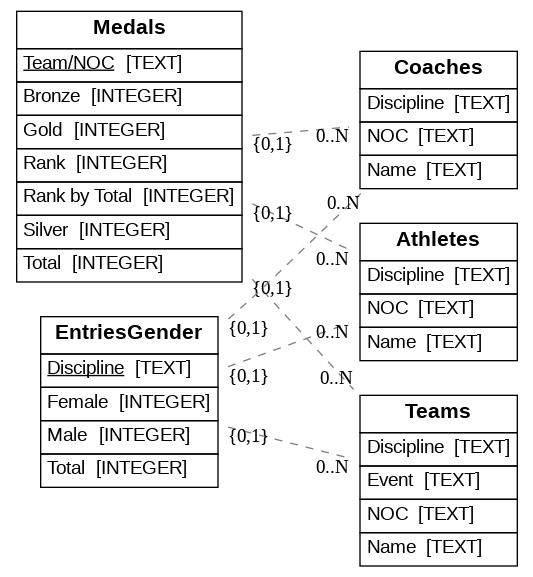

In [630]:

# Generate ERD directly from SQLite
from eralchemy2 import render_er

# Path to your database
db_path = "Tokyo_olympics.db"

# Output file (PDF or PNG)
render_er(f"sqlite:///{db_path}", "Tokyo_olympics_erd.png")

# Display in notebook
from IPython.display import Image
Image("Tokyo_olympics_erd.png")

In [631]:

df_athletes.to_sql("Athletes", connect, if_exists="append", index=False) ### athletes table loaded in database
df_Coaches.to_sql("Coaches", connect, if_exists="append", index=False)  ### Coaches table loaded in database
df_EntriesGender.to_sql("EntriesGender", connect, if_exists="append", index=False) ### EnteriesGender table loaded in database
df_Medals.to_sql("Medals", connect, if_exists="append", index=False) ### Medals table loaded in database
df_Teams.to_sql("Teams", connect, if_exists="append", index=False) ### Teams table loaded in database

cursor=connect.cursor()
connect.commit()

 ### athletes table column infromation
pd.read_sql_query("""select * from athletes limit 10;""", connect)

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball
5,ABALO Luc,France,Handball
6,ABAROA Cesar,Chile,Rowing
7,ABASS Abobakr,Sudan,Swimming
8,ABBASALI Hamideh,Islamic Republic of Iran,Karate
9,ABBASOV Islam,Azerbaijan,Wrestling


In [632]:
 ### Coaches table column information

pd.read_sql_query("""select * from Coaches limit 3;""", connect)

,Name,NOC,Discipline
0,ABDELMAGID Wael,Egypt,Football
1,ABE Junya,Japan,Volleyball
2,ABE Katsuhiko,Japan,Basketball


In [633]:
pd.read_sql_query("""select * from EntriesGender limit 3;""", connect)   ### EnteriesGender table information

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196


In [634]:
### whats the most frequent discipline in the table?

pd.read_sql_query(""" select count(Discipline) as Count_discipline, NOC, Discipline from Athletes
                        group by Discipline, NOC order by Count_discipline desc limit 5;""", connect)

### athletics discipline has highest count and country is USA


,Count_discipline,NOC,Discipline
0,144,United States of America,Athletics
1,95,Germany,Athletics
2,75,Great Britain,Athletics
3,73,Italy,Athletics
4,70,Japan,Athletics


In [635]:


pd.read_sql_query("""select distinct c.Name as Coaches_name, a.Name as Athletes_name,
a.Discipline, a.NOC from Athletes a join Coaches c on a.NOC=c.NOC and
a.Discipline=c.Discipline limit 15;""", connect)    ### Athltes has multiple Coaches

,Coaches_name,Athletes_name,Discipline,NOC
0,ALLER CARBALLO Manuel Angel,ABALDE Alberto,Basketball,Spain
1,DIAZ FERNANDEZ Jenaro Manuel,ABALDE Alberto,Basketball,Spain
2,GONZALEZ JARENO Angel,ABALDE Alberto,Basketball,Spain
3,HERNANDEZ FRAILE Jose Ignacio,ABALDE Alberto,Basketball,Spain
4,LAZARO CORRAL Jesus,ABALDE Alberto,Basketball,Spain
5,MIRET GARCIA Daniel,ABALDE Alberto,Basketball,Spain
6,MONDELO GARCIA Lucas,ABALDE Alberto,Basketball,Spain
7,PRADO BRANAS Joaquin,ABALDE Alberto,Basketball,Spain
8,SCARIOLO Sergio,ABALDE Alberto,Basketball,Spain
9,ZAMORA PEDREIRA Javier,ABALDE Alberto,Basketball,Spain


In [636]:
### what are the count of athletes_count  and coah_count?

pd.read_sql_query(""" select  a.NOC as country, a.Discipline as discipline, count(distinct a.Name) as athletes_count,
                      count(distinct c.Name) as coach_count, ROUND(100* count(distinct c.Name) /count(distinct a.Name), 2)
                      as coaches_per_athlets_percentage
                      from Athletes a join Coaches c
                      on a.NOC=c.NOC and a.Discipline=c.Discipline
                      Group by a.NOC, a.Discipline order by coach_count desc limit 10;""", connect)

## Spain has highest number of athletes and coach.

,country,discipline,athletes_count,coach_count,coaches_per_athlets_percentage
0,Spain,Basketball,24,10,41.0
1,Nigeria,Basketball,23,9,39.0
2,United States of America,Basketball,23,9,39.0
3,Australia,Hockey,35,6,17.0
4,Chile,Football,21,6,28.0
5,Japan,Football,42,6,14.0
6,Spain,Artistic Swimming,8,6,75.0
7,United States of America,Baseball/Softball,38,6,15.0
8,Australia,Basketball,23,5,21.0
9,Côte d'Ivoire,Football,20,5,25.0


In [637]:
pd.read_sql_query("""select  sum(Female) as total_female
                    from EntriesGender;""", connect)
                                                   ### total female population is 5432.

,total_female
0,5432


In [638]:
pd.read_sql_query("""select  sum(Male) as total_male
                    from EntriesGender;""", connect)  ### total male population is 5884.

,total_male
0,5884


In [639]:
### which discipline has highest female population?
pd.read_sql_query("""select Discipline, sum(Female) as total_male_in_discipline
                    from EntriesGender group by Discipline order by sum(female) desc limit 1;""", connect)
  ### Athletics discipline has highest female population : 969

,Discipline,total_male_in_discipline
0,Athletics,969


In [640]:
### which discipline has highest male population?
pd.read_sql_query("""select Discipline, sum(Male) as total_male_in_discipline
                    from EntriesGender group by Discipline order by sum(Male) desc limit 1;""", connect)
### Athletics has highest male population: 1072

,Discipline,total_male_in_discipline
0,Athletics,1072


In [641]:
### what is the total athletes over discipline?
pd.read_sql_query("""SELECT Discipline, COUNT(Name) AS Total_Athletes
FROM Athletes
GROUP BY Discipline
ORDER BY Total_Athletes DESC
LIMIT 10;""", connect)


,Discipline,Total_Athletes
0,Athletics,2068
1,Swimming,743
2,Football,567
3,Rowing,496
4,Hockey,406
5,Judo,373
6,Shooting,342
7,Handball,342
8,Sailing,336
9,Rugby Sevens,283


In [642]:
### show female percentage according to the discipline.

pd.read_sql_query("""SELECT Discipline, Female, Male, ROUND(Female * 100.0 / Total, 2) AS Female_Percentage
FROM EntriesGender
ORDER BY Female_Percentage DESC
LIMIT 10;""", connect)

### Artistic Swimming has the highest female population in it.

,Discipline,Female,Male,Female_Percentage
0,Artistic Swimming,105,0,100.00
1,Rhythmic Gymnastics,96,0,100.00
2,Cycling BMX Freestyle,10,9,52.63
3,Diving,72,71,50.35
4,3x3 Basketball,32,32,50.00
5,Archery,64,64,50.00
6,Artistic Gymnastics,98,98,50.00
7,Basketball,144,144,50.00
8,Beach Volleyball,48,48,50.00
9,Canoe Slalom,41,41,50.00


In [643]:
### show male percentage according to the discipline.
pd.read_sql_query("""SELECT Discipline, Female, Male, ROUND(Male * 100.0 / Total, 2) AS male_Percentage
FROM EntriesGender
ORDER BY male_Percentage DESC
LIMIT 10;""", connect)

### Wrestling has highest male population in it.

,Discipline,Female,Male,male_Percentage
0,Wrestling,96,193,66.78
1,Cycling Road,70,131,65.17
2,Boxing,102,187,64.71
3,Equestrian,73,125,63.13
4,Baseball/Softball,90,144,61.54
5,Football,264,344,56.58
6,Water Polo,122,146,54.48
7,Swimming,361,418,53.66
8,Athletics,969,1072,52.52
9,Cycling Track,90,99,52.38


In [644]:
pd.read_sql_query("""select * from Medals limit 3; """, connect)  ### Medals table columns information

,Team/NOC,Gold,Silver,Bronze,Total,Rank,Rank by Total
0,United States of America,39,41,33,113,1,1
1,People's Republic of China,38,32,18,88,2,2
2,Japan,27,14,17,58,3,5


In [645]:
### what are the top ten countries that won medals?

pd.read_sql_query("""SELECT "Team/NOC" AS Country, Gold, Silver, Bronze, Total
FROM Medals
ORDER BY Gold DESC
LIMIT 10;
 """, connect)

,Country,Gold,Silver,Bronze,Total
0,United States of America,39,41,33,113
1,People's Republic of China,38,32,18,88
2,Japan,27,14,17,58
3,Great Britain,22,21,22,65
4,ROC,20,28,23,71
5,Australia,17,7,22,46
6,Netherlands,10,12,14,36
7,France,10,12,11,33
8,Germany,10,11,16,37
9,Italy,10,10,20,40


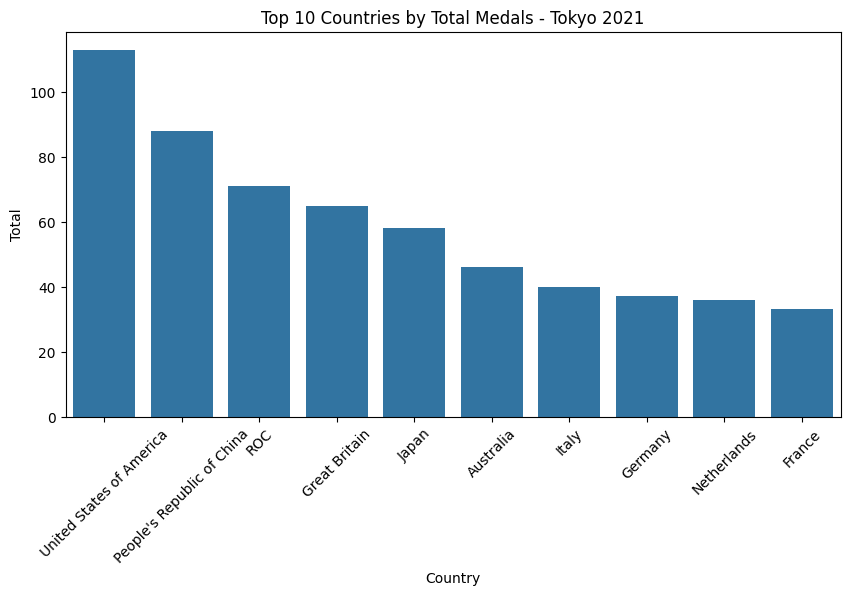

In [646]:
# Top 10 countries by total medals
df_medals = pd.read_sql_query("""
SELECT "Team/NOC" AS Country, Total
FROM Medals ORDER BY Total DESC LIMIT 10;
""", connect)
df_medals

plt.figure(figsize=(10,5))
sns.barplot(data=df_medals, x="Country", y="Total")
plt.title("Top 10 Countries by Total Medals - Tokyo 2021")
plt.xticks(rotation=45)
plt.show()

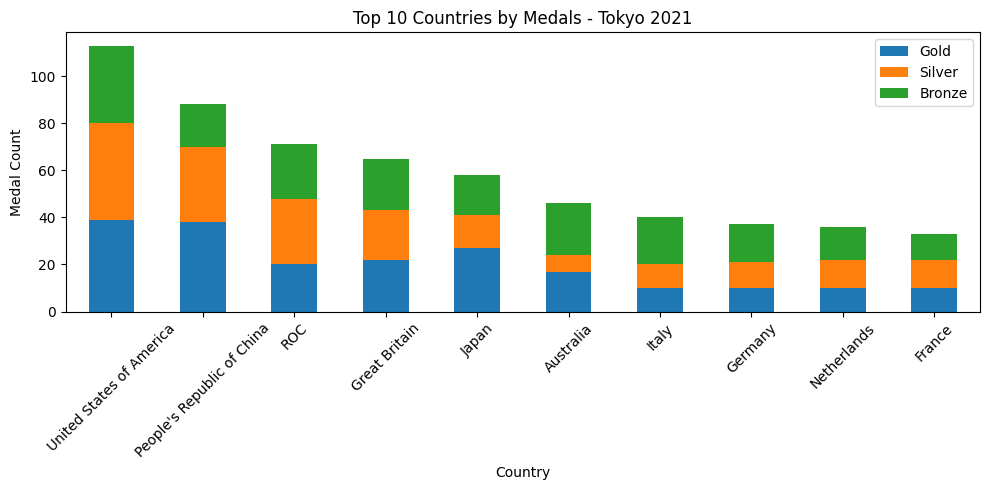

In [647]:
df_medals = pd.read_sql_query("""
SELECT "Team/NOC" AS Country, Gold, Silver, Bronze, Total
FROM Medals
ORDER BY Total DESC
LIMIT 10;
""", connect)

df_medals.plot(
    x="Country",
    y=["Gold", "Silver", "Bronze"],
    kind="bar",
    stacked=True,
    figsize=(10,5),

)
plt.title("Top 10 Countries by Medals - Tokyo 2021")
plt.ylabel("Medal Count")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [648]:
### whats the female ratio in each countries?

pd.read_sql_query("""
SELECT a.NOC AS Country,
       SUM(e.Female) AS Total_Female,
       SUM(e.Male) AS Total_Male,
       ROUND(SUM(e.Female)*100.0/(SUM(e.Female)+SUM(e.Male)), 2) AS Female_Ratio
FROM Athletes a
JOIN EntriesGender e ON a.Discipline = e.Discipline
GROUP BY a.NOC
ORDER BY Female_Ratio DESC
LIMIT 10;
""", connect)


,Country,Total_Female,Total_Male,Female_Ratio
0,Liechtenstein,1124,1037,52.01
1,Myanmar,264,265,49.91
2,Bermuda,312,320,49.37
3,Vanuatu,449,466,49.07
4,Angola,4585,4811,48.80
5,Fiji,5356,5692,48.48
6,Malaysia,5035,5376,48.36
7,Indonesia,4721,5064,48.25
8,Greece,28320,30546,48.11
9,Singapore,4257,4593,48.10


In [649]:
#  Female vs Male participation
df_gender = pd.read_sql_query("""
SELECT SUM(Female) AS Female, SUM(Male) AS Male FROM EntriesGender;
""", connect)
df_gender

,Female,Male
0,5432,5884


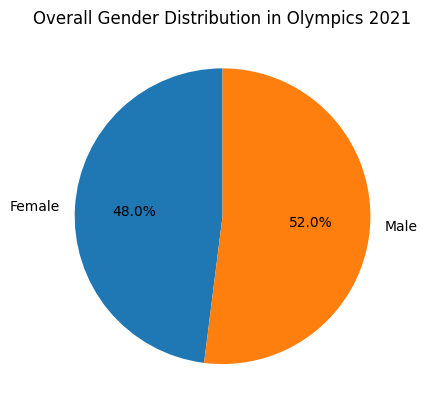

In [650]:

plt.pie(df_gender.values[0], labels=['Female','Male'], autopct='%1.1f%%', startangle=90)
plt.title("Overall Gender Distribution in Olympics 2021")
plt.show()

In [651]:
### what the discipline that needed highest coach number?
pd.read_sql_query("""
SELECT Discipline,
       COUNT(DISTINCT Name) AS Coach_Count
FROM Coaches
GROUP BY Discipline
ORDER BY Coach_Count DESC
LIMIT 1;
""", connect)
### Basketball 74 coach

,Discipline,Coach_Count
0,Basketball,74


In [652]:
### what are the sports that have most Athletes?

pd.read_sql_query("""
SELECT Discipline,
       COUNT(Name) AS Athlete_Count
FROM Athletes
GROUP BY Discipline
ORDER BY Athlete_Count DESC
LIMIT 10;
""", connect)

### Athletics

,Discipline,Athlete_Count
0,Athletics,2068
1,Swimming,743
2,Football,567
3,Rowing,496
4,Hockey,406
5,Judo,373
6,Shooting,342
7,Handball,342
8,Sailing,336
9,Rugby Sevens,283


In [653]:
# which countries are participated in olympics but did not win any medals?

pd.read_sql_query("""
SELECT DISTINCT a.NOC AS Athlete_NOC
FROM Athletes a
WHERE a.NOC NOT IN (
  SELECT DISTINCT m."Team/NOC" FROM Medals m
)
ORDER BY a.NOC;
""", connect)
 # These are countries that appear Athletes table (they sent athletes)
 # but do NOT appear in your Medals table (they didn’t win any medals).

,Athlete_NOC
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra
...,...
108,"Virgin Islands, British"
109,"Virgin Islands, US"
110,Yemen
111,Zambia


In [654]:
### Show medals per country

pd.read_sql_query("""
SELECT
  a.NOC AS Country,
  COUNT(a.Name) AS Total_Athletes,
  COALESCE(m.Gold, 0) AS Gold,
  COALESCE(m.Silver, 0) AS Silver,
  COALESCE(m.Bronze, 0) AS Bronze,
  COALESCE(m.Total, 0) AS Total_Medals
FROM Athletes a
Left JOIN Medals m
  ON a.NOC = m."Team/NOC"
GROUP BY a.NOC
ORDER BY Total_Medals DESC, Total_Athletes DESC;
""", connect)


,Country,Total_Athletes,Gold,Silver,Bronze,Total_Medals
0,United States of America,615,39,41,33,113
1,People's Republic of China,401,38,32,18,88
2,ROC,318,20,28,23,71
3,Great Britain,366,22,21,22,65
4,Japan,586,27,14,17,58
...,...,...,...,...,...,...
201,South Sudan,2,0,0,0,0
202,St Vincent and the Grenadines,2,0,0,0,0
203,Tuvalu,2,0,0,0,0
204,United Republic of Tanzania,2,0,0,0,0


In [655]:
### what were the disciplines of USA?
pd.read_sql_query("""select distinct NOC, Discipline from Athletes where NOC="United States of America";""", connect)


,NOC,Discipline
0,United States of America,Baseball/Softball
1,United States of America,Athletics
2,United States of America,Basketball
3,United States of America,Trampoline Gymnastics
4,United States of America,Volleyball
5,United States of America,Artistic Swimming
6,United States of America,Marathon Swimming
7,United States of America,Surfing
8,United States of America,Swimming
9,United States of America,Rugby Sevens


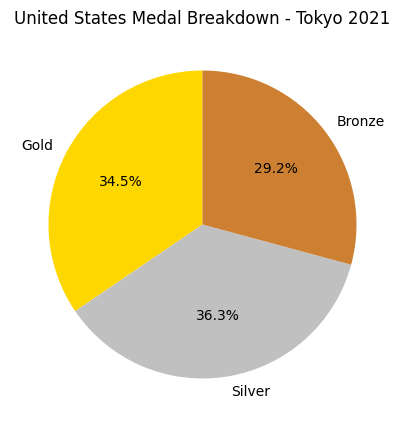

In [656]:
df_us = pd.read_sql_query("""
SELECT Gold, Silver, Bronze
FROM Medals
WHERE "Team/NOC" = 'United States of America';
""", connect)

colors = ["#FFD700","#C0C0C0","#CD7F32"]
plt.figure(figsize=(5,5))
plt.pie(df_us.values[0], labels=["Gold","Silver","Bronze"], autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("United States Medal Breakdown - Tokyo 2021")
plt.show()

In [657]:
pd.read_sql_query("""select * from Teams; """, connect) ### Teams table colum information

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women
...,...,...,...,...
738,South Africa,Water Polo,South Africa,Women
739,Spain,Water Polo,Spain,Men
740,Spain,Water Polo,Spain,Women
741,United States,Water Polo,United States of America,Men


In [658]:
### Total athletes and teams per country
pd.read_sql_query("""
SELECT a.NOC AS Country,
       COUNT(DISTINCT a.Name) AS Total_Athletes,
       COUNT(DISTINCT t.Name) AS Total_Teams
FROM Athletes a
LEFT JOIN Teams t ON a.NOC = t.NOC
GROUP BY a.NOC
ORDER BY Total_Athletes DESC;
""", connect)


,Country,Total_Athletes,Total_Teams
0,United States of America,614,5
1,Japan,585,4
2,Australia,470,4
3,Germany,399,5
4,People's Republic of China,398,4
...,...,...,...
201,Dominica,2,0
202,Central African Republic,2,0
203,Brunei Darussalam,2,0
204,Bermuda,2,0


In [659]:
### Total vs Coached Athletes (Country-Level Analysis)


pd.read_sql_query("""
WITH total_athletes AS (
    SELECT
        NOC,
        COUNT(DISTINCT Name) AS Total_Athletes
    FROM Athletes
    GROUP BY NOC
),
coached_athletes AS (
    SELECT
        a.NOC,
        COUNT(DISTINCT a.Name) AS Coached_Athletes
    FROM Athletes a
    JOIN Coaches c
        ON a.NOC = c.NOC
       AND a.Discipline = c.Discipline
    GROUP BY a.NOC
)
SELECT
    t.NOC AS Country,
    t.Total_Athletes,
    COALESCE(ca.Coached_Athletes, 0) AS Coached_Athletes,
    ROUND(100.0 * COALESCE(ca.Coached_Athletes, 0) / t.Total_Athletes, 2) AS Percent_Coached
FROM total_athletes t
LEFT JOIN coached_athletes ca ON t.NOC = ca.NOC
ORDER BY t.Total_Athletes DESC
LIMIT 10;
""", connect)                                     ### Not all athletes had Coach


,Country,Total_Athletes,Coached_Athletes,Percent_Coached
0,United States of America,614,154,25.08
1,Japan,585,247,42.22
2,Australia,470,171,36.38
3,Germany,399,77,19.30
4,People's Republic of China,398,92,23.12
5,France,377,96,25.46
6,Canada,368,120,32.61
7,Great Britain,366,79,21.58
8,Italy,354,66,18.64
9,Spain,324,141,43.52


In [660]:
### Country-Level Coach-to-Athlete Ratio

pd.read_sql_query("""
SELECT a.NOC AS Country,
       COUNT(DISTINCT a.Name) AS Athletes,
       COUNT(DISTINCT c.Name) AS Coaches,
       ROUND(1.0 * COUNT(DISTINCT c.Name) / COUNT(DISTINCT a.Name), 3) AS Coach_Athlete_Ratio
FROM Athletes a
JOIN Coaches c
  ON a.NOC = c.NOC
 AND a.Discipline = c.Discipline
GROUP BY a.NOC
ORDER BY Athletes DESC
LIMIT 10;
""", connect)
                         ### Japan had the highest Coach to athlete ration

,Country,Athletes,Coaches,Coach_Athlete_Ratio
0,Japan,247,35,0.142
1,Australia,171,21,0.123
2,United States of America,154,28,0.182
3,Spain,141,26,0.184
4,Canada,120,15,0.125
5,Argentina,116,9,0.078
6,Brazil,104,7,0.067
7,France,96,10,0.104
8,People's Republic of China,92,11,0.120
9,New Zealand,92,8,0.087


In [661]:

### what is the Male vs Female teams by country?

df_teams=pd.read_sql_query("""
SELECT NOC AS Country,
       SUM(CASE WHEN Event = 'Men' THEN 1 ELSE 0 END) AS Male_Teams,
       SUM(CASE WHEN Event = 'Women' THEN 1 ELSE 0 END) AS Female_Teams
FROM Teams
GROUP BY NOC
ORDER BY Female_Teams DESC;
""", connect)
df_teams                                  ### People's Republic of China	had highest number of female teams which is 9.

,Country,Male_Teams,Female_Teams
0,People's Republic of China,1,9
1,Japan,9,9
2,United States of America,6,8
3,ROC,4,6
4,Netherlands,3,6
...,...,...,...
79,Bangladesh,0,0
80,Bahrain,1,0
81,Bahamas,0,0
82,Azerbaijan,0,0


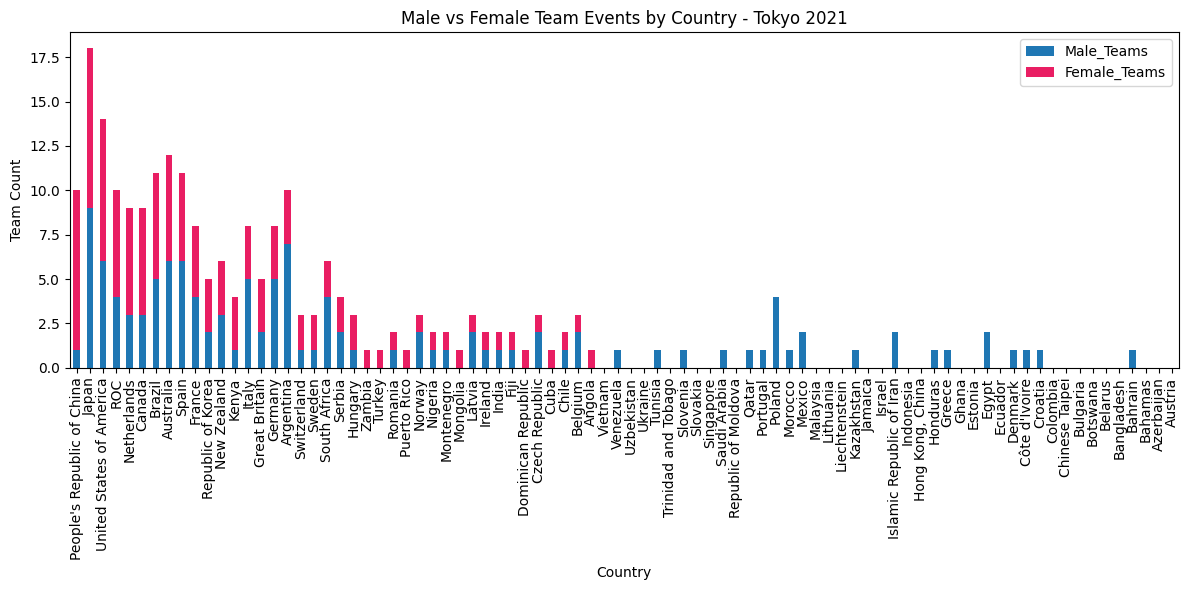

In [662]:
df_teams.plot(
    x="Country",
    kind="bar",
    stacked=True,
    color=["#1f77b4","#e91e63"],
    figsize=(12,6)
)
plt.title("Male vs Female Team Events by Country - Tokyo 2021")
plt.ylabel("Team Count")
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [663]:
### country-wise medal efficiency

pd.read_sql_query("""
SELECT
  m."Team/NOC" AS Country,
  m.Gold, m.Silver, m.Bronze, m.Total,
  COUNT(DISTINCT a.Name) AS Total_Athletes,
  ROUND(1.0 * m.Total / COUNT(DISTINCT a.Name), 3) AS Medal_Efficiency
FROM Medals m
JOIN Athletes a ON a.NOC = m."Team/NOC"
GROUP BY m."Team/NOC"
ORDER BY Medal_Efficiency DESC;
""", connect)
                                 ### San Mariono hashas very few athletes but it's medal efficiency is highest.
                                 ### Althoug USA won the highest number of medal but country had more althletes.

,Country,Gold,Silver,Bronze,Total,Total_Athletes,Medal_Efficiency
0,San Marino,0,1,2,3,4,0.750
1,Bermuda,1,0,0,1,2,0.500
2,Armenia,0,2,2,4,16,0.250
3,Georgia,2,5,1,8,35,0.229
4,ROC,20,28,23,71,318,0.223
...,...,...,...,...,...,...,...
88,Lithuania,0,1,0,1,37,0.027
89,Mexico,0,0,4,4,155,0.026
90,Morocco,1,0,0,1,48,0.021
91,South Africa,1,2,0,3,171,0.018


In [664]:
### country wise medal per athlete and avg female participation percentage


pd.read_sql_query("""
SELECT
  a.NOC AS Country,
  COUNT(DISTINCT a.Name) AS Total_Athletes,
  COALESCE(m.Gold,0) AS Gold,
  COALESCE(m.Silver,0) AS Silver,
  COALESCE(m.Bronze,0) AS Bronze,
  COALESCE(m.Total,0) AS Total_Medals,
  ROUND(1.0*m.Total / COUNT(DISTINCT a.Name), 3) AS Medals_per_Athlete,
  ROUND(AVG(e.Female * 100.0 / e.Total), 2) AS Avg_Female_Participation
FROM Athletes a
LEFT JOIN Medals m ON a.NOC = m."Team/NOC"
LEFT JOIN EntriesGender e ON a.Discipline = e.Discipline
GROUP BY a.NOC, m.Gold, m.Silver, m.Bronze, m.Total
ORDER BY Total_Medals DESC;
""", connect)


,Country,Total_Athletes,Gold,Silver,Bronze,Total_Medals,Medals_per_Athlete,Avg_Female_Participation
0,United States of America,614,39,41,33,113,0.184,47.69
1,People's Republic of China,398,38,32,18,88,0.221,49.41
2,ROC,318,20,28,23,71,0.223,49.63
3,Great Britain,366,22,21,22,65,0.178,47.72
4,Japan,585,27,14,17,58,0.099,48.47
...,...,...,...,...,...,...,...,...
201,"Virgin Islands, British",3,0,0,0,0,NaN,47.10
202,"Virgin Islands, US",4,0,0,0,0,NaN,47.54
203,Yemen,3,0,0,0,0,NaN,47.94
204,Zambia,29,0,0,0,0,NaN,43.25
